<a href="https://colab.research.google.com/github/Nsad9579/Clinical-Projects/blob/main/Missing_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd 
import numpy as np
import missingno as msno 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
pip install pyreadstat 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 37.0 MB/s 


| veriable | exp |
| --- | --- | 
| bloodGroup | 1 = A , 2 = B , 3 = AB , 4 = O |
| RH | 1 = rh- , 0 = rh+ | 
| Sex | 1 = male , 0 = F | 
|  others | 1 = y , 0 = n | 


In [3]:
df = pd.read_csv('/content/final.csv')

In [4]:
df.head()

,bloodGroup,RH,weight,height,Age,Sex,CVD,HTN,DM,Renal Disese,...,WBC1,LymphocyteCount1,NeutrophilCount1,HbHct1,RBC1,Plat1,ESR1,CRP1,FBS1,creatinine1
0,1.0,0.0,76.0,169.0,63.0,1,0.0,0.0,0.0,0.0,...,1.9,89.2,NaN,6.8,2.37,12.0,88.0,22.9,NaN,1.3
1,2.0,1.0,90.0,179.0,75.0,1,0.0,1.0,1.0,1.0,...,7.6,1260.0,5250.0,6.1,3.56,176.0,60.0,7.2,360.0,3.7
2,2.0,0.0,82.0,158.0,75.0,0,0.0,1.0,0.0,1.0,...,8.7,16.2,78.2,9.5,3.20,195.0,10.0,302.2,97.0,2.7
3,NaN,NaN,NaN,NaN,74.0,0,0.0,1.0,1.0,0.0,...,5.3,22.1,73.8,12.0,4.30,210.0,43.0,31.3,321.0,0.8
4,1.0,0.0,79.0,159.0,57.0,0,0.0,1.0,1.0,0.0,...,7.9,20.1,79.7,13.3,4.79,245.0,81.0,77.2,NaN,0.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bloodGroup        126 non-null    float64
 1   RH                124 non-null    float64
 2   weight            250 non-null    float64
 3   height            250 non-null    float64
 4   Age               294 non-null    float64
 5   Sex               296 non-null    int64  
 6   CVD               286 non-null    float64
 7   HTN               285 non-null    float64
 8   DM                287 non-null    float64
 9   Renal Disese      284 non-null    float64
 10  lung Disease      264 non-null    float64
 11  Malignancy        287 non-null    float64
 12  fever             289 non-null    float64
 13  chills            289 non-null    float64
 14  cough             289 non-null    float64
 15  sputum            289 non-null    float64
 16  rhi0rrhoea        289 non-null    float64
 1

In [21]:
df.columns

Index(['bloodGroup', 'RH', 'weight', 'height', 'Age', 'Sex', 'CVD', 'HTN',
       'DM', 'Renal Disese', 'lung Disease', 'Malignancy', 'fever', 'chills',
       'cough', 'sputum', 'rhi0rrhoea', 'dyspenea', 'headace', 'fatigu',
       'dirrhea', 'myalgiaa', 'abdomalPain', 'chestPain', 'naunsea', 'a0rexia',
       'death', 'WBC1', 'LymphocyteCount1', 'NeutrophilCount1', 'HbHct1',
       'RBC1', 'Plat1', 'ESR1', 'CRP1', 'FBS1', 'creatinine1'],
      dtype='object')

In [24]:
cat_cols = ['bloodGroup' , 'RH' , 'Sex', 'CVD', 'HTN',
       'DM', 'Renal Disese', 'lung Disease', 'Malignancy', 'fever', 'chills',
       'cough', 'sputum', 'rhi0rrhoea', 'dyspenea', 'headace', 'fatigu',
       'dirrhea', 'myalgiaa', 'abdomalPain', 'chestPain', 'naunsea', 'a0rexia']
df[cat_cols] = df[cat_cols].astype('category')

In [10]:
df.describe()

,weight,height,Age,WBC1,LymphocyteCount1,NeutrophilCount1,HbHct1,RBC1,Plat1,ESR1,CRP1,FBS1,creatinine1
count,250.00000,250.000000,294.000000,296.000000,284.000000,278.000000,290.000000,258.000000,291.000000,268.000000,270.000000,210.000000,283.000000
mean,76.89600,167.328000,57.914966,8.521858,25.042641,89.827446,11.284176,4.145233,7818.489588,45.746269,48.641296,142.033333,1.697456
std,14.52975,9.132031,16.818330,5.280302,74.598472,310.962422,2.737477,0.866174,45360.313242,25.407595,71.365885,73.561704,2.519689
min,0.00000,138.000000,1.000000,1.900000,1.100000,1.500000,0.300000,1.540000,2.570000,1.000000,1.100000,48.000000,0.200000
25%,68.00000,160.000000,45.000000,5.000000,11.850000,64.600000,9.700000,3.562500,166.500000,27.000000,14.000000,92.250000,0.900000
50%,78.00000,167.000000,59.000000,7.250000,19.350000,73.200000,11.650000,4.190000,210.000000,44.500000,31.950000,113.000000,1.100000
75%,86.00000,175.000000,70.000000,10.300000,26.350000,80.950000,13.175000,4.657500,302.000000,63.000000,62.500000,172.750000,1.400000
max,140.00000,195.000000,96.000000,37.000000,1260.000000,5250.000000,18.800000,6.450000,468000.000000,129.000000,812.000000,452.000000,34.800000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bloodGroup        126 non-null    category
 1   RH                124 non-null    category
 2   weight            250 non-null    float64 
 3   height            250 non-null    float64 
 4   Age               294 non-null    float64 
 5   Sex               296 non-null    category
 6   CVD               286 non-null    category
 7   HTN               285 non-null    category
 8   DM                287 non-null    category
 9   Renal Disese      284 non-null    category
 10  lung Disease      264 non-null    category
 11  Malignancy        287 non-null    category
 12  fever             289 non-null    category
 13  chills            289 non-null    category
 14  cough             289 non-null    category
 15  sputum            289 non-null    category
 16  rhi0rrhoea        289 non-

## Aproach to Missing Values

/usr/local/lib/python3.7/dist-packages/missingno/missingno.py:62: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


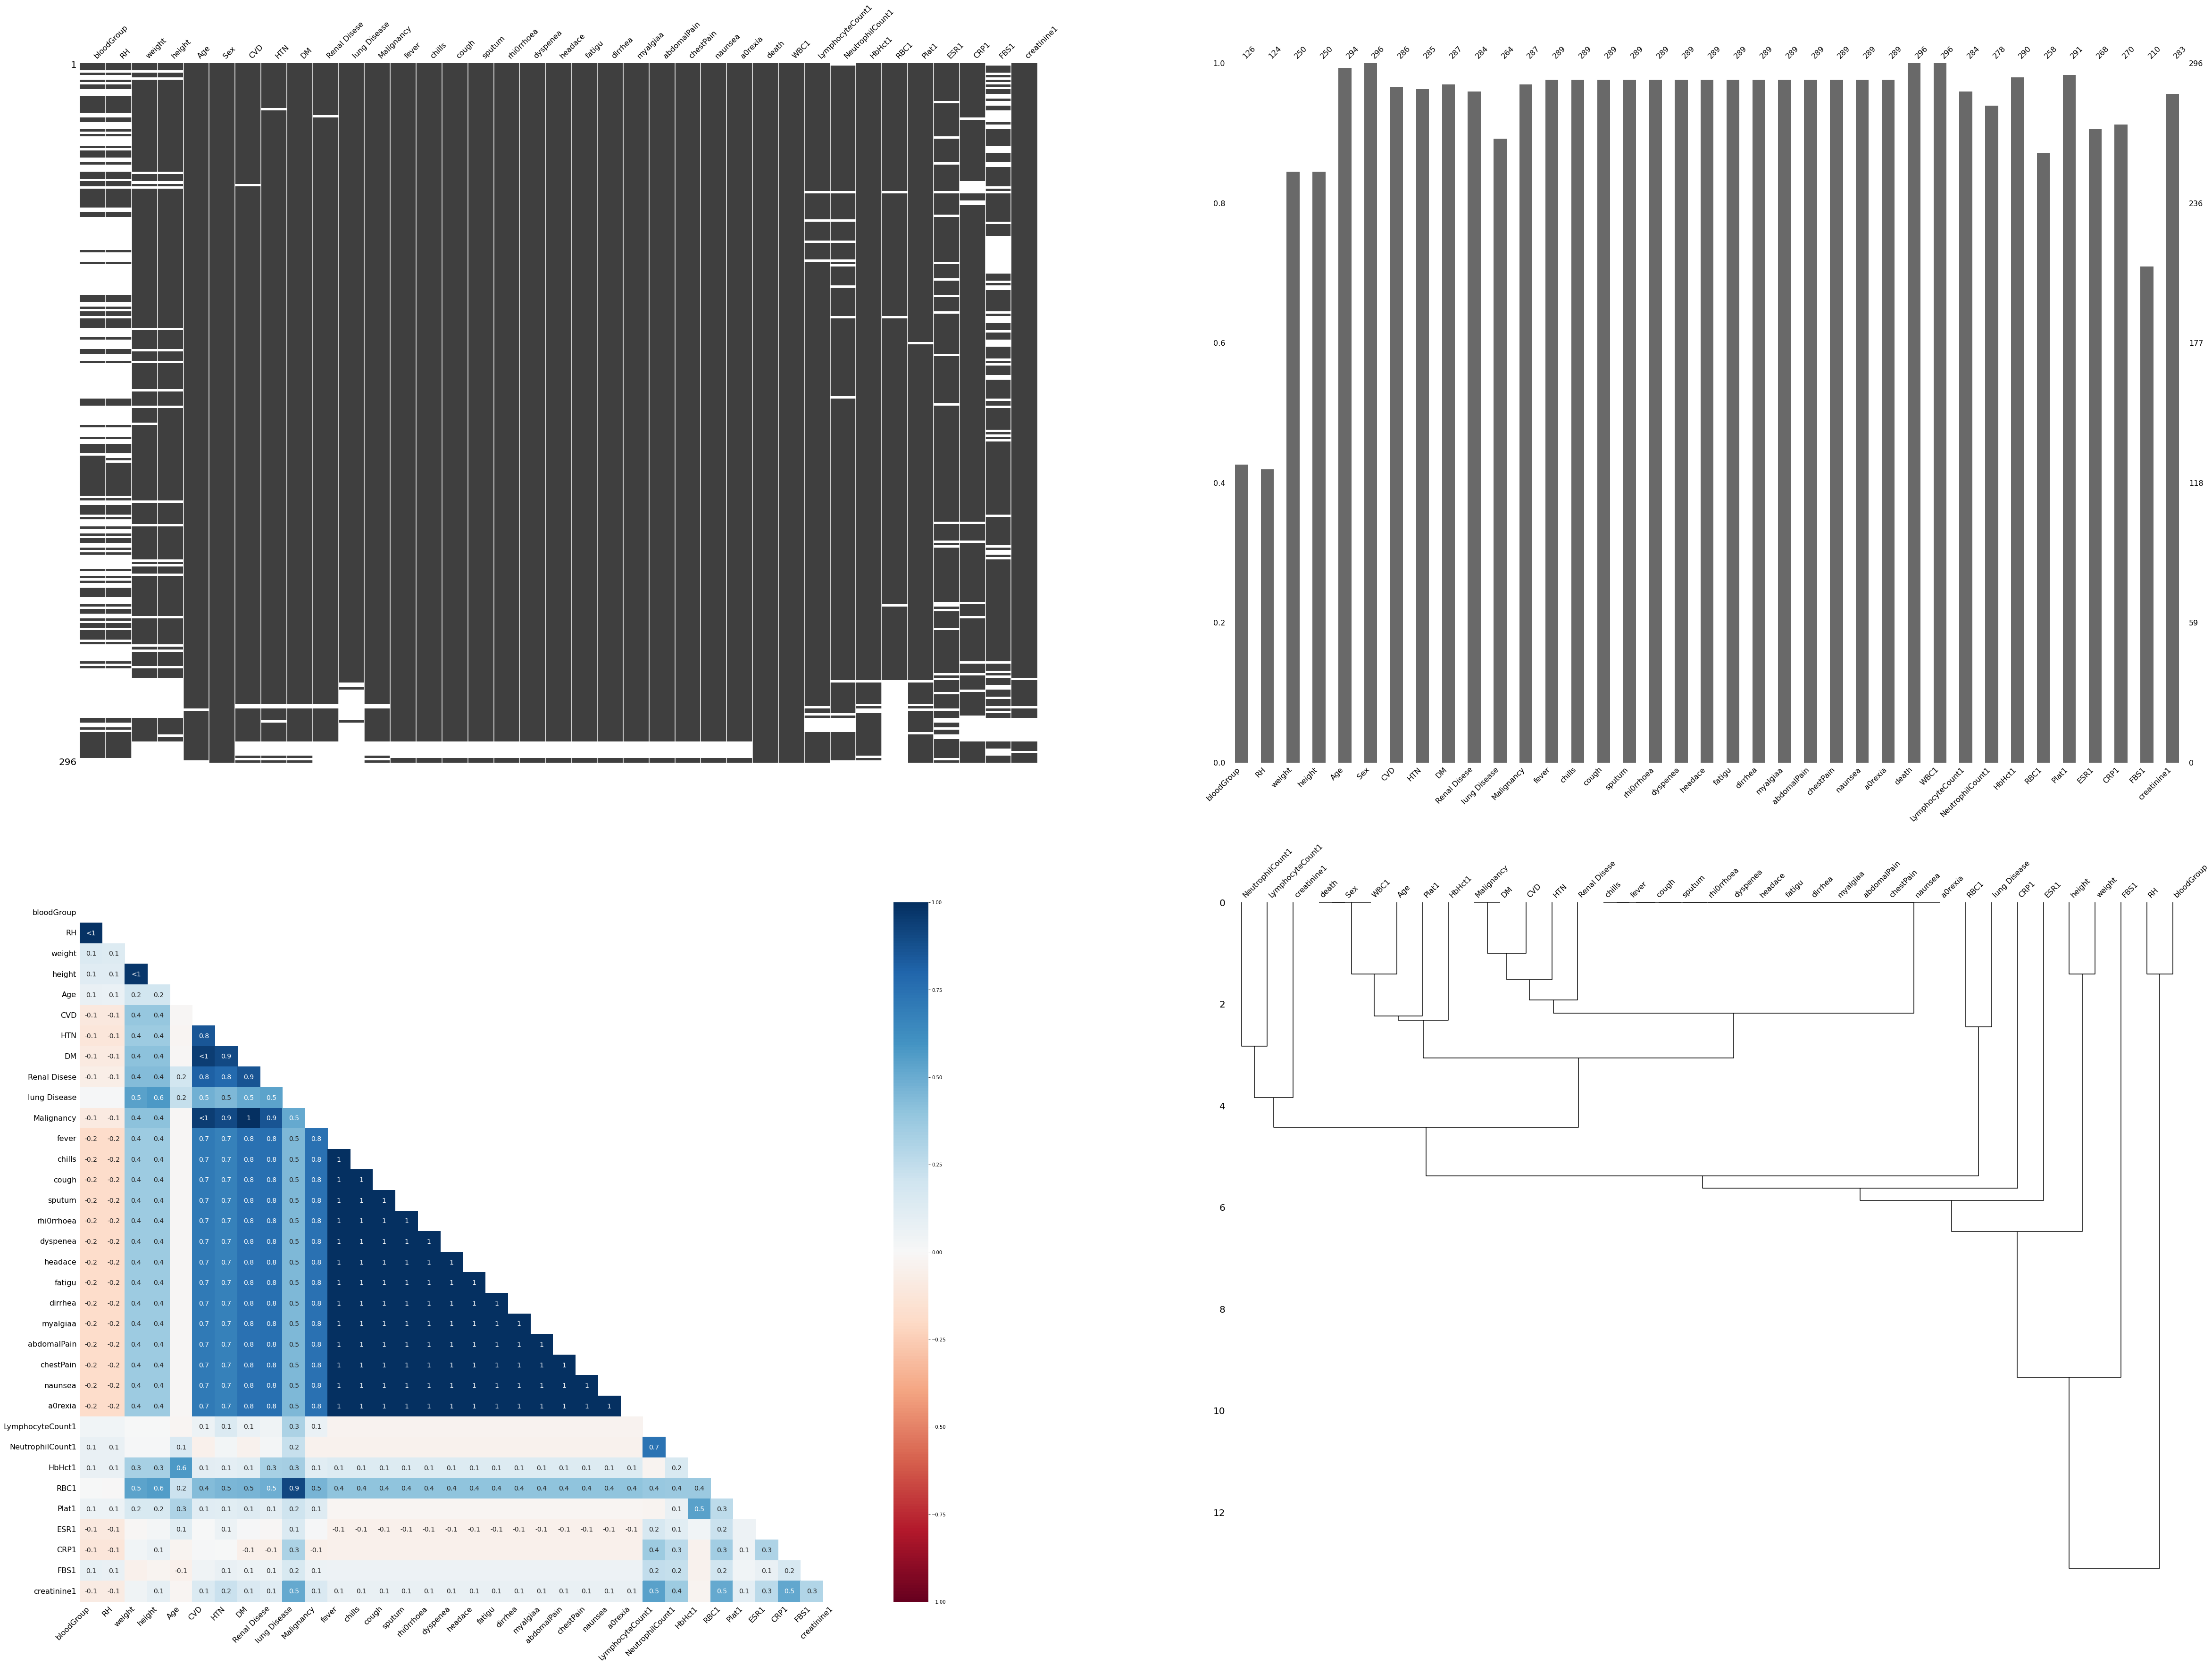

In [16]:
fig, axes = plt.subplots(2,2,figsize=(80,60))
msno.matrix(df,ax=axes[0, 0])
msno.bar(df,ax=axes[0, 1])
msno.heatmap(df,ax=axes[1,0])
msno.dendrogram(df,ax=axes[1, 1])

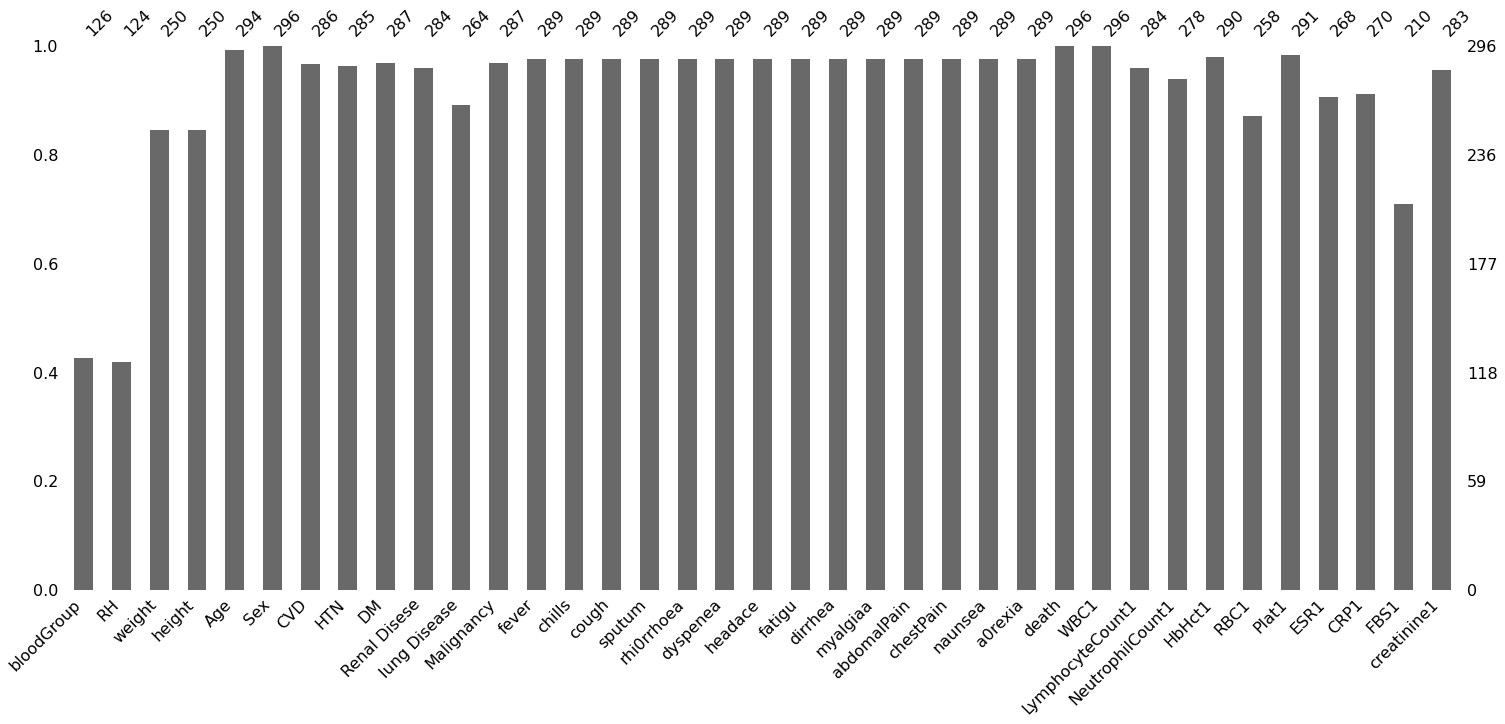

In [17]:
msno.bar(df)

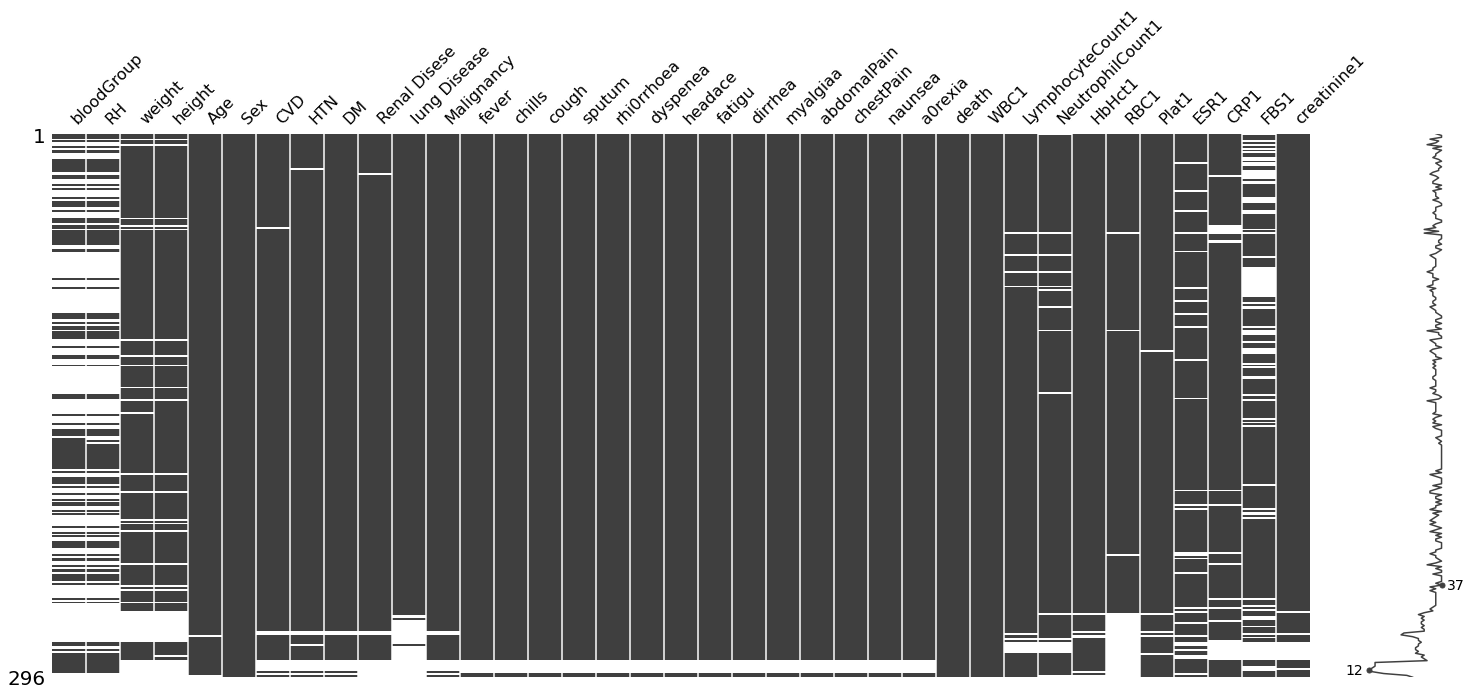

In [20]:
#sorted=df.sort_values("rbc")
msno.matrix(df)

Solution
## Deletion
Listwise deletion:

It is preferred when there is a Missing Completely at Random case.In Listwise deletion entire rows(which hold the missing values) are deleted. It is also known as complete-case analysis as it removes all data that have one or more missing values.

ContranIndications:

if the size of the dataset is small
Pairwise Deletion:

Pairwise Deletion is used if missingness is Missing Completely at Random i.e MCAR. It reduce the loss that happens in Listwise deletion. It is also called an available-case analysis as it removes only null observation, not the entire row.

Dropping complete columns

If a column holds more than 80% missing values, and the feature is not meaningful, that time we can drop the entire column.

Imputation:
- To build an accurate model of our application, we must first fill in any data gaps in our dataset. A variety of sizes and shapes are offered in the form of imputations. These are a few techniques:
Single Imputation: Only add missing values to the dataset once, to create an imputed dataset.

Univariate Imputation: This is the case in which only the target variable is used to generate the imputed values.

Numerous imputations: Duplicate missing value imputation across multiple rows of data. To get multiple imputed datasets, you must repeat a single imputation process.
Multivariate Imputation: Impute values based on other variables, such as estimating missing values using linear regression.

|Type	| Solution | 
| --- | --- |
| MNAR | Improve dataset find data | 
| MCAR | Deleting rows or columns | 
| MAR |	Imputation of data | 

In [22]:
num_cols = ['weight', 'height', 'Age' , 'WBC1', 'LymphocyteCount1', 'NeutrophilCount1', 'HbHct1',
       'RBC1', 'Plat1', 'ESR1', 'CRP1', 'FBS1', 'creatinine1']

In [26]:
X = df.drop('death', axis =1 )
Y = df['death']

In [28]:
knn_imputer = KNNImputer(n_neighbors=5)
X[num_cols] = knn_imputer.fit_transform(X[num_cols])
simple_imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imputer_cat.fit(X[cat_cols])
X[cat_cols] = simple_imputer_cat.transform(X[cat_cols])

## Categorical data

In [29]:
one_hot_encoded_data = pd.get_dummies(X, columns = ['bloodGroup'])

## Numerical data

In [30]:
X_num = one_hot_encoded_data[num_cols]
scaler = MinMaxScaler()
scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
one_hot_encoded_data[num_cols] = pd.DataFrame(X_num_scaled, columns = num_cols)

In [32]:
one_hot_encoded_data.to_csv('PreProcessedData.csv')

### Split dataset

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(one_hot_encoded_data, Y , test_size=0.33, random_state=42)

In [34]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, Y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(Y_test, preds)

0.8775510204081632

In [36]:
from sklearn.model_selection import cross_val_score,KFold

xgb_cl = xgb.XGBClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(xgb_cl,X_test,Y_test,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.85       0.85       0.95       0.84210526 0.94736842]
Average Cross Validation score :0.8878947368421052
